In [1]:
import os
import numpy as np
import xarray as xr
import pandas as pd
import seaborn as sns
import geopandas as gpd

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

import sys
sys.path.append(os.path.abspath(".."))
from function import ART_statistic as ART_sta

import warnings
warnings.filterwarnings('ignore')

In [2]:
lon_min, lon_max, lat_min, lat_max, area, toll = 6.5, 19, 36.5, 48, 'ITALY', 0.002

Tr = [5,  10,  20,  50, 100, 200]
Fi = 1 - 1/np.array(Tr)

In [3]:
COMPUTERNAME = os.environ['COMPUTERNAME']
print(f'Computer: {COMPUTERNAME}')

if COMPUTERNAME == 'BR_DELL':
    dir_font = os.path.join('/','run')
else:
    dir_font = os.path.join('/')

Computer: BR_DELL


In [4]:
veneto_dir = os.path.join(dir_font,'media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    REGIONS = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson'))
    DEM = gpd.read_file(os.path.join(veneto_dir,'DEM','Italy_dem_800.geojson'))
    ITALY = gpd.read_file(os.path.join(veneto_dir,'Italy_clear.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

REGIONS = REGIONS.rename(columns={"reg_name": "Region"})
REGIONS['Region'] = REGIONS['Region'].replace('Emilia Romagna', 'Emilia-Romagna')

In [5]:
obs_base = os.path.join(dir_font,'media','arturo','T9','Data','Italy','Rain_Gauges_QC')
dir_base = os.path.join(dir_font,'media','arturo','T9','Data','Italy')

In [6]:
METADATA = pd.read_csv(os.path.join(obs_base, 'data', 'METADATA', 'METADATA_FTS_QCv4_Case1_wAIRHO_v3_1dy.csv'))
ISO_names = np.unique(METADATA.ISO.values)

In [7]:
colors = ['royalblue','r', 'g', 'c', 'y', 'purple', 'orange', 'cyan']

## Relative Error Distribution

In [8]:
# def get_relative_error(product, val_max=1.1):

#     list_remove = ['IT-820_1424_FTS_1440_QCv4.csv', 'IT-250_602781_FTS_1440_QCv4.csv', 'IT-250_602779_FTS_1440_QCv4.csv', 'IT-780_2370_FTS_1440_QCv4.csv', 'IT-750_450_FTS_1440_QCv4.csv']

#     hdf5_file = os.path.join(dir_base,'statistics',f'statistics_obs_{product}.h5')
#     data = pd.HDFStore(hdf5_file, mode='r')

#     keys = data.keys()
#     keys_QUANTILES = [k for k in keys if k.endswith("/QUANTILES")]
#     keys_INFO = [k for k in keys if k.endswith('/INFO')]

#     stations = []
#     lats, lons, elevs = [], [], []
#     RED, REDn = [], []
#     RER, RERn = [], []
#     for nn in range(len(keys_INFO)):
#         station = keys_INFO[nn].split('/')[2]
        
#         if station in list_remove:
#             continue
#         else:
#             lat = data[keys_INFO[nn]]['lat_obs'].values[0]
#             lon = data[keys_INFO[nn]]['lon_obs'].values[0]
#             elev = data[keys_INFO[nn]]['elev_obs'].values[0]
#             RED_ = data[keys_QUANTILES[nn]].RE_down.values[3]
#             RER_ = data[keys_QUANTILES[nn]].RE_raw.values[3]

#             stations.append(station)
#             lats.append(lat)
#             lons.append(lon)
#             elevs.append(elev)
#             RED.append(RED_)
#             RER.append(RER_)

#     REDn = (RED - np.nanmin(RED))/(np.nanmax(RED) - np.nanmin(RED))
#     RERn = (RER - np.nanmin(RER))/(np.nanmax(RER) - np.nanmin(RER))

#     DF_DATA = pd.DataFrame({'STATION':stations, 'LON':lons, 'LAT':lats, 'ELEV':elevs, 'RER':RER, 'RERn':RERn, 'RED':RED, 'REDn':REDn})
#     DF_DATA.loc[DF_DATA['RER'] > val_max, 'RER'] = np.nan
#     DF_DATA.loc[DF_DATA['RER'].isna(), 'RED'] = np.nan

#     return DF_DATA

In [9]:
dir_ =os.path.join(dir_font,'media','arturo','T9','Data','Italy')

DF_IMERG = ART_sta.get_relative_error('IMERG',dir_)
DF_CMORPH = ART_sta.get_relative_error('CMORPH',dir_)
DF_MSWEP = ART_sta.get_relative_error('MSWEP',dir_)
DF_ERA5 = ART_sta.get_relative_error('ERA5',dir_)
DF_GSMaP = ART_sta.get_relative_error('GSMaP',dir_)
DF_CHIRPS = ART_sta.get_relative_error('CHIRPS',dir_)

DF_ENSEMBLE = ART_sta.get_relative_error('ENSEMBLE_ALL_mean',dir_)

In [10]:
len(DF_IMERG), len(DF_CMORPH), len(DF_MSWEP), len(DF_ERA5), len(DF_GSMaP), len(DF_CHIRPS), len(DF_ENSEMBLE)

(2695, 2695, 2695, 2695, 2695, 2695, 2695)

../figures/Article_down/Products_DOWN_RE_dist_median.png


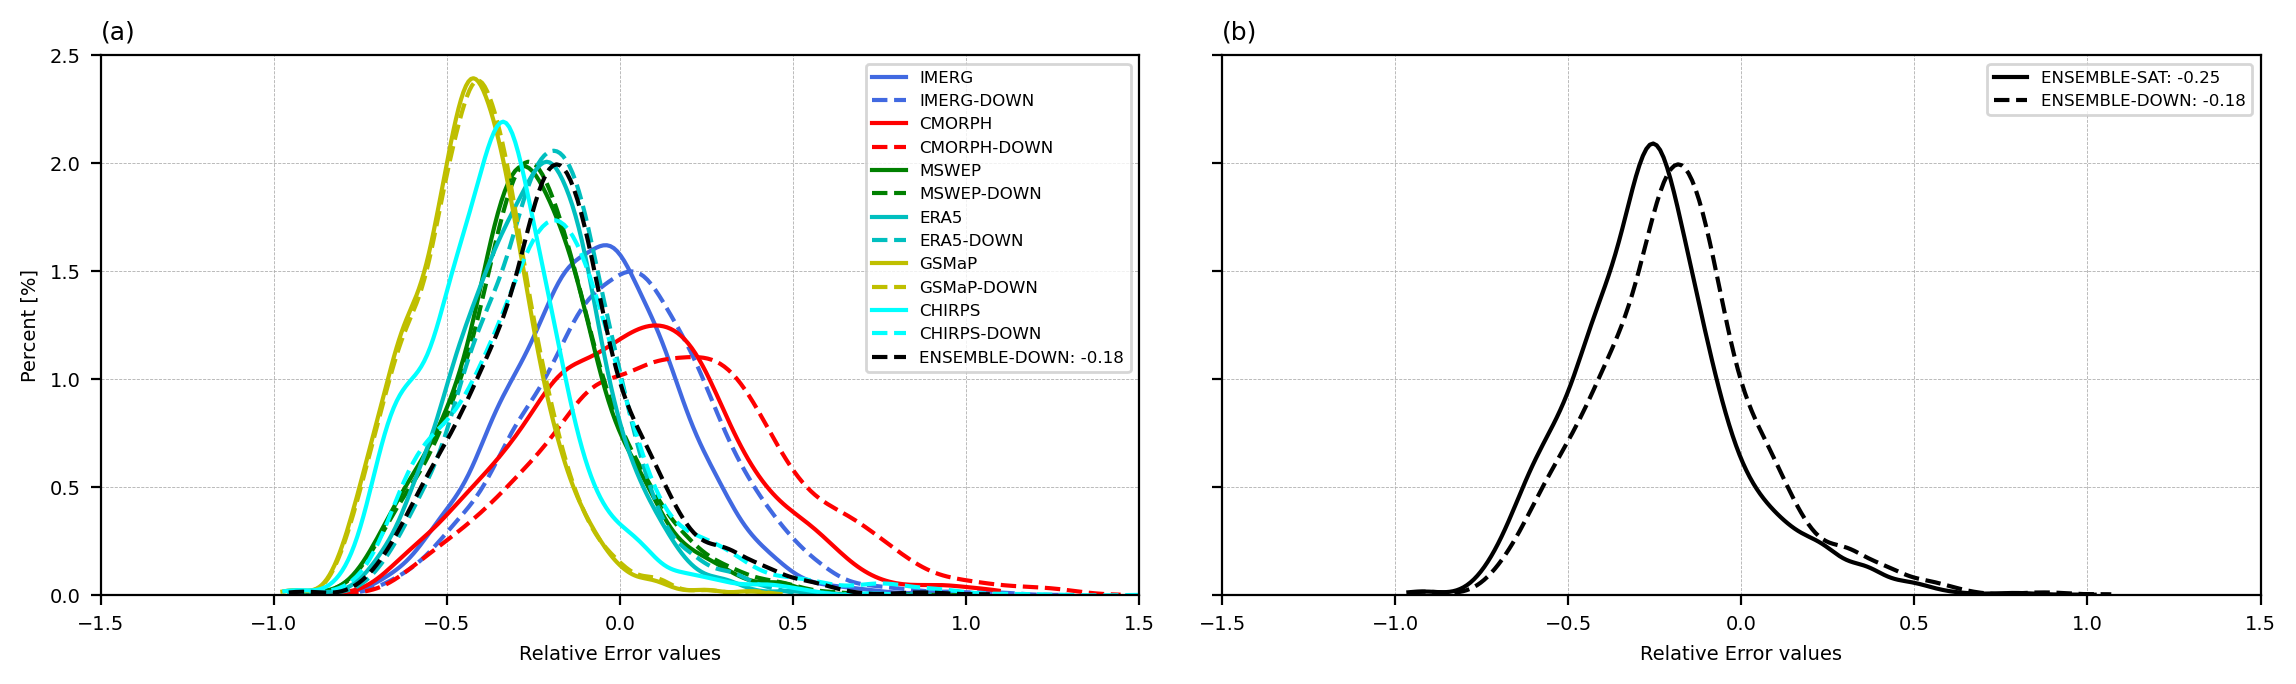

In [11]:
fig = plt.figure(figsize=(12,3),dpi=200)
gs = gridspec.GridSpec(1,2)

# =========================================================================================================================
ax1 = plt.subplot(gs[0, 0])

sns.kdeplot(DF_IMERG.RER,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG',
            clip=(np.nanmin(np.array(DF_IMERG.RER)), np.nanmax(np.array(DF_IMERG.RER))))
sns.kdeplot(DF_IMERG.RED,color=colors[0], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG-DOWN',
            clip=(np.nanmin(np.array(DF_IMERG.RED)), np.nanmax(np.array(DF_IMERG.RED))))

sns.kdeplot(DF_CMORPH.RER,color=colors[1],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CMORPH',
            clip=(np.nanmin(np.array(DF_CMORPH.RER)), np.nanmax(np.array(DF_CMORPH.RER))))
sns.kdeplot(DF_CMORPH.RED,color=colors[1], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CMORPH-DOWN',
            clip=(np.nanmin(np.array(DF_CMORPH.RED)), np.nanmax(np.array(DF_CMORPH.RED))))

sns.kdeplot(DF_MSWEP.RER,color=colors[2],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'MSWEP',
            clip=(np.nanmin(np.array(DF_MSWEP.RER)), np.nanmax(np.array(DF_MSWEP.RER))))
sns.kdeplot(DF_MSWEP.RED,color=colors[2], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'MSWEP-DOWN',
            clip=(np.nanmin(np.array(DF_MSWEP.RED)), np.nanmax(np.array(DF_MSWEP.RED))))

sns.kdeplot(DF_ERA5.RER,color=colors[3],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ERA5',
            clip=(np.nanmin(np.array(DF_ERA5.RER)), np.nanmax(np.array(DF_ERA5.RER))))
sns.kdeplot(DF_ERA5.RED,color=colors[3], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ERA5-DOWN',
            clip=(np.nanmin(np.array(DF_ERA5.RED)), np.nanmax(np.array(DF_ERA5.RED))))

sns.kdeplot(DF_GSMaP.RER,color=colors[4],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'GSMaP',
            clip=(np.nanmin(np.array(DF_GSMaP.RER)), np.nanmax(np.array(DF_GSMaP.RER))))
sns.kdeplot(DF_GSMaP.RED,color=colors[4], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'GSMaP-DOWN',
            clip=(np.nanmin(np.array(DF_GSMaP.RED)), np.nanmax(np.array(DF_GSMaP.RED))))

sns.kdeplot(DF_CHIRPS.RER,color=colors[7],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CHIRPS',
            clip=(np.nanmin(np.array(DF_CHIRPS.RER)), np.nanmax(np.array(DF_CHIRPS.RER))))
sns.kdeplot(DF_CHIRPS.RED,color=colors[7], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CHIRPS-DOWN',
            clip=(np.nanmin(np.array(DF_CHIRPS.RED)), np.nanmax(np.array(DF_CHIRPS.RED))))

sns.kdeplot(DF_ENSEMBLE.RED,color='k', linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE-DOWN: {np.round(np.nanmean(DF_ENSEMBLE.RED),2)}',
            clip=(np.nanmin(np.array(DF_ENSEMBLE.RED)), np.nanmax(np.array(DF_ENSEMBLE.RED))))

ax1.set_ylabel('Percent [%]',fontsize=7)
ax1.set_xlabel('Relative Error values',fontsize=7)
ax1.legend(fontsize=6, loc=0, ncol=1)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(0,2.5)
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_title(f'(a)',fontsize=9, loc='left')

# =========================================================================================================================
ax1 = plt.subplot(gs[0, 1])

sns.kdeplot(DF_ENSEMBLE.RER,color='k',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE-SAT: {np.round(np.nanmean(DF_ENSEMBLE.RER),2)}',
            clip=(np.nanmin(np.array(DF_ENSEMBLE.RER)), np.nanmax(np.array(DF_ENSEMBLE.RER))))
sns.kdeplot(DF_ENSEMBLE.RED,color='k', linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE-DOWN: {np.round(np.nanmean(DF_ENSEMBLE.RED),2)}',
            clip=(np.nanmin(np.array(DF_ENSEMBLE.RED)), np.nanmax(np.array(DF_ENSEMBLE.RED))))

ax1.set_xlabel('Relative Error values',fontsize=7)
ax1.legend(fontsize=6, loc=0, ncol=1)
ax1.grid(linewidth=0.3, linestyle='--')

ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(0,2.5)
ax1.set_yticklabels('')
ax1.set_ylabel('')
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_title(f'(b)',fontsize=9, loc='left')

# ============================================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.08, hspace=0.15)

salida = '../figures/Article_down/Products_DOWN_RE_dist_median.png'
print(salida)
# plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

## Elevation Analysis

In [ ]:
QUARTILE_IMERG, QUARTILE_IMERG_M = ART_sta.DF_elevation(DF_IMERG)
QUARTILE_CMORPH, QUARTILE_CMORPH_M = ART_sta.DF_elevation(DF_CMORPH)
QUARTILE_MSWEP, QUARTILE_MSWEP_M = ART_sta.DF_elevation(DF_MSWEP)
QUARTILE_ERA5, QUARTILE_ERA5_M = ART_sta.DF_elevation(DF_ERA5)
QUARTILE_GSMaP, QUARTILE_GSMaP_M = ART_sta.DF_elevation(DF_GSMaP)
QUARTILE_CHIRPS, QUARTILE_CHIRPS_M = ART_sta.DF_elevation(DF_CHIRPS)

QUARTILE_ENSEMBLE, QUARTILE_ENSEMBLE_M = ART_sta.DF_elevation(DF_ENSEMBLE)

Export figure to: ../figures/Article_down/Elevation_groups.png


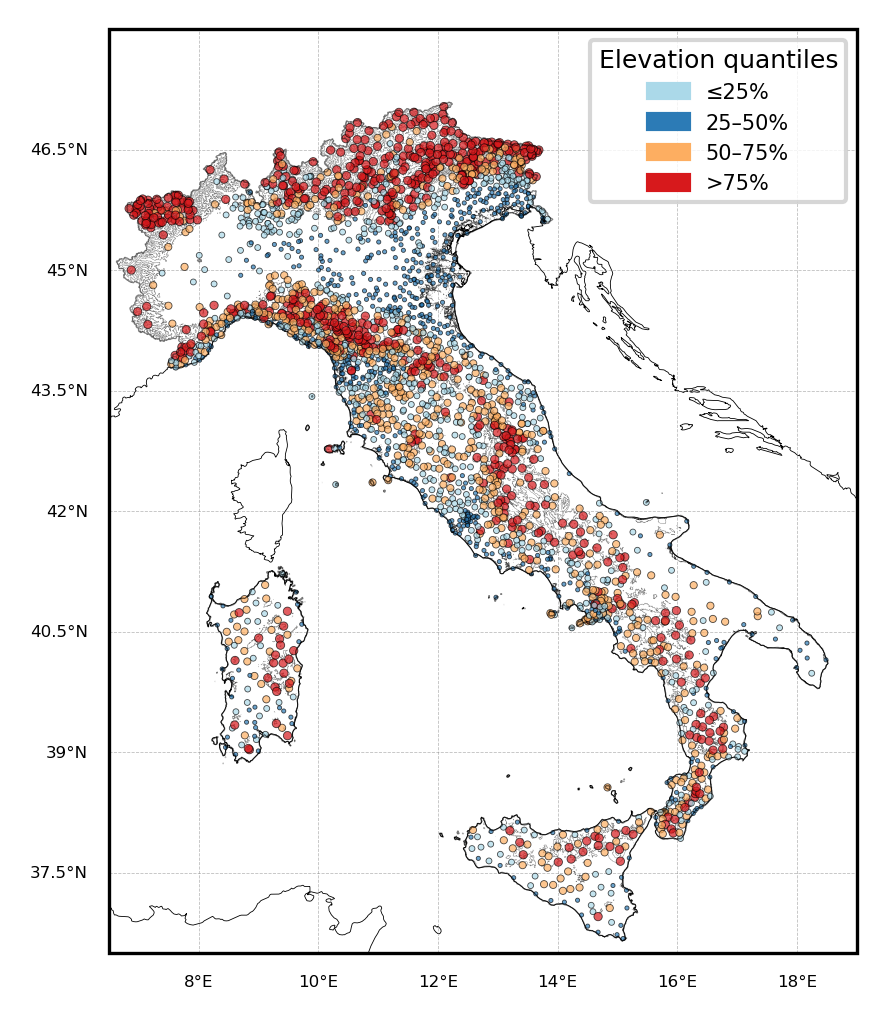

In [41]:
elev_cmap = plt.cm.Spectral_r

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ===========================================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,color='k')
# REGIONS.plot(facecolor='None', ax=ax1, linewidth=0.1, zorder=10)
ITALY.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.3, zorder=21, alpha=0.5)
DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=2, alpha=0.5)

group_codes = DF_IMERG['ELEV_QUARTILE'].cat.codes

a1 = ax1.scatter(
    DF_IMERG['LON'],
    DF_IMERG['LAT'],
    c=DF_IMERG['ELEV_color'],
    s=DF_IMERG['ELEV_QUARTILEn'],
    alpha=0.7,
    zorder=20,
    edgecolor='k',
    linewidth=0.2
)

group_colors = {
    '≤25%':  '#abd9e9',
    '25–50%': '#2c7bb6',
    '50–75%': '#fdae61',
    '>75%':   '#d7191c'
}

legend_elements = [
    mpatches.Patch(color=color, label=label)
    for label, color in group_colors.items()
]

ax1.legend(
    handles=legend_elements,
    title='Elevation quantiles',
    loc='upper right',
    fontsize=5,
    title_fontsize=6,
    frameon=True
)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

# ===========================================================================================================================================
salida = os.path.join('..','figures','Article_down','Elevation_groups.png')
print(f'Export figure to: {salida}')
# plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

## Scatter plot

In [42]:
DF_IMERG

STATION       LON        LAT  \
0              IT-880_37021_FTS_1440_QCv4.csv  9.423059  39.513886   
1              IT-880_35807_FTS_1440_QCv4.csv  8.965278  39.157227   
2              IT-880_35803_FTS_1440_QCv4.csv  8.998891  39.016945   
3              IT-880_35799_FTS_1440_QCv4.csv  8.848888  39.033059   
4              IT-880_35795_FTS_1440_QCv4.csv  8.620274  38.974442   
...                                       ...       ...        ...   
2690  IT-210_PIE-001139-900_FTS_1440_QCv4.csv  7.241139  44.812810   
2691  IT-210_PIE-001134-900_FTS_1440_QCv4.csv  7.409486  45.439288   
2692  IT-210_PIE-001128-900_FTS_1440_QCv4.csv  7.492737  45.288798   
2693  IT-210_PIE-001097-900_FTS_1440_QCv4.csv  7.390821  44.963696   
2694  IT-210_PIE-001030-900_FTS_1440_QCv4.csv  7.847798  45.514302   

             ELEV       RER      RERn       RED      REDn     ELEVn  \
0       53.375229  0.200485  0.316654  0.294594  0.316603  0.018378   
1      159.336197 -0.483489  0.127757 -0.456352  0.124330  0.053137   
2       13.748610  0.015584  0.265589  0.093092  0.265010  0.005379   
3      711.876099 -0.274276  0.185537 -0.231553  0.181888  0.234391   
4        4.243435  0.143898  0.301026  0.239708  0.302550  0.002261   
...           ...       ...       ...       ...       ...       ...   
2690   474.270203 -0.377380  0.157062 -0.313702  0.160854  0.156447   
2691  1129.634033 -0.478180  0.129224 -0.441748  0.128069  0.371431   
2692   582.489075 -0.497731  0.123824 -0.444975  0.127243  0.191947   
2693   322.049591 -0.052719  0.246725  0.041823  0.251883  0.106513   
2694   338.677490 -0.285473  0.182444 -0.218876  0.185133  0.111968   

     ELEV_QUARTILE  ELEV_QUARTILEn ELEV_color  
0             ≤25%               1    #2c7bb6  
1           25–50%               2    #abd9e9  
2             ≤25%               1    #2c7bb6  
3             >75%               4    #d7191c  
4             ≤25%               1    #2c7bb6  
...            ...             ...        ...  
2690        50–75%               3    #fdae61  
2691          >75%               4    #d7191c  
2692        50–75%               3    #fdae61  
2693        25–50%               2    #abd9e9  
2694        50–75%               3    #fdae61  

[2695 rows x 12 columns]

## Elevation Analysis

In [24]:
DF_LIST = [DF_IMERG, DF_CMORPH, DF_MSWEP, DF_ERA5, DF_GSMaP, DF_CHIRPS]
names_list = ['IMERG', 'CMORPH', 'MSWEP', 'ERA5', 'GSMaP', 'CHIRPS']
letters_list = ['(a)','(b)','(c)','(d)','(e)','(f)']

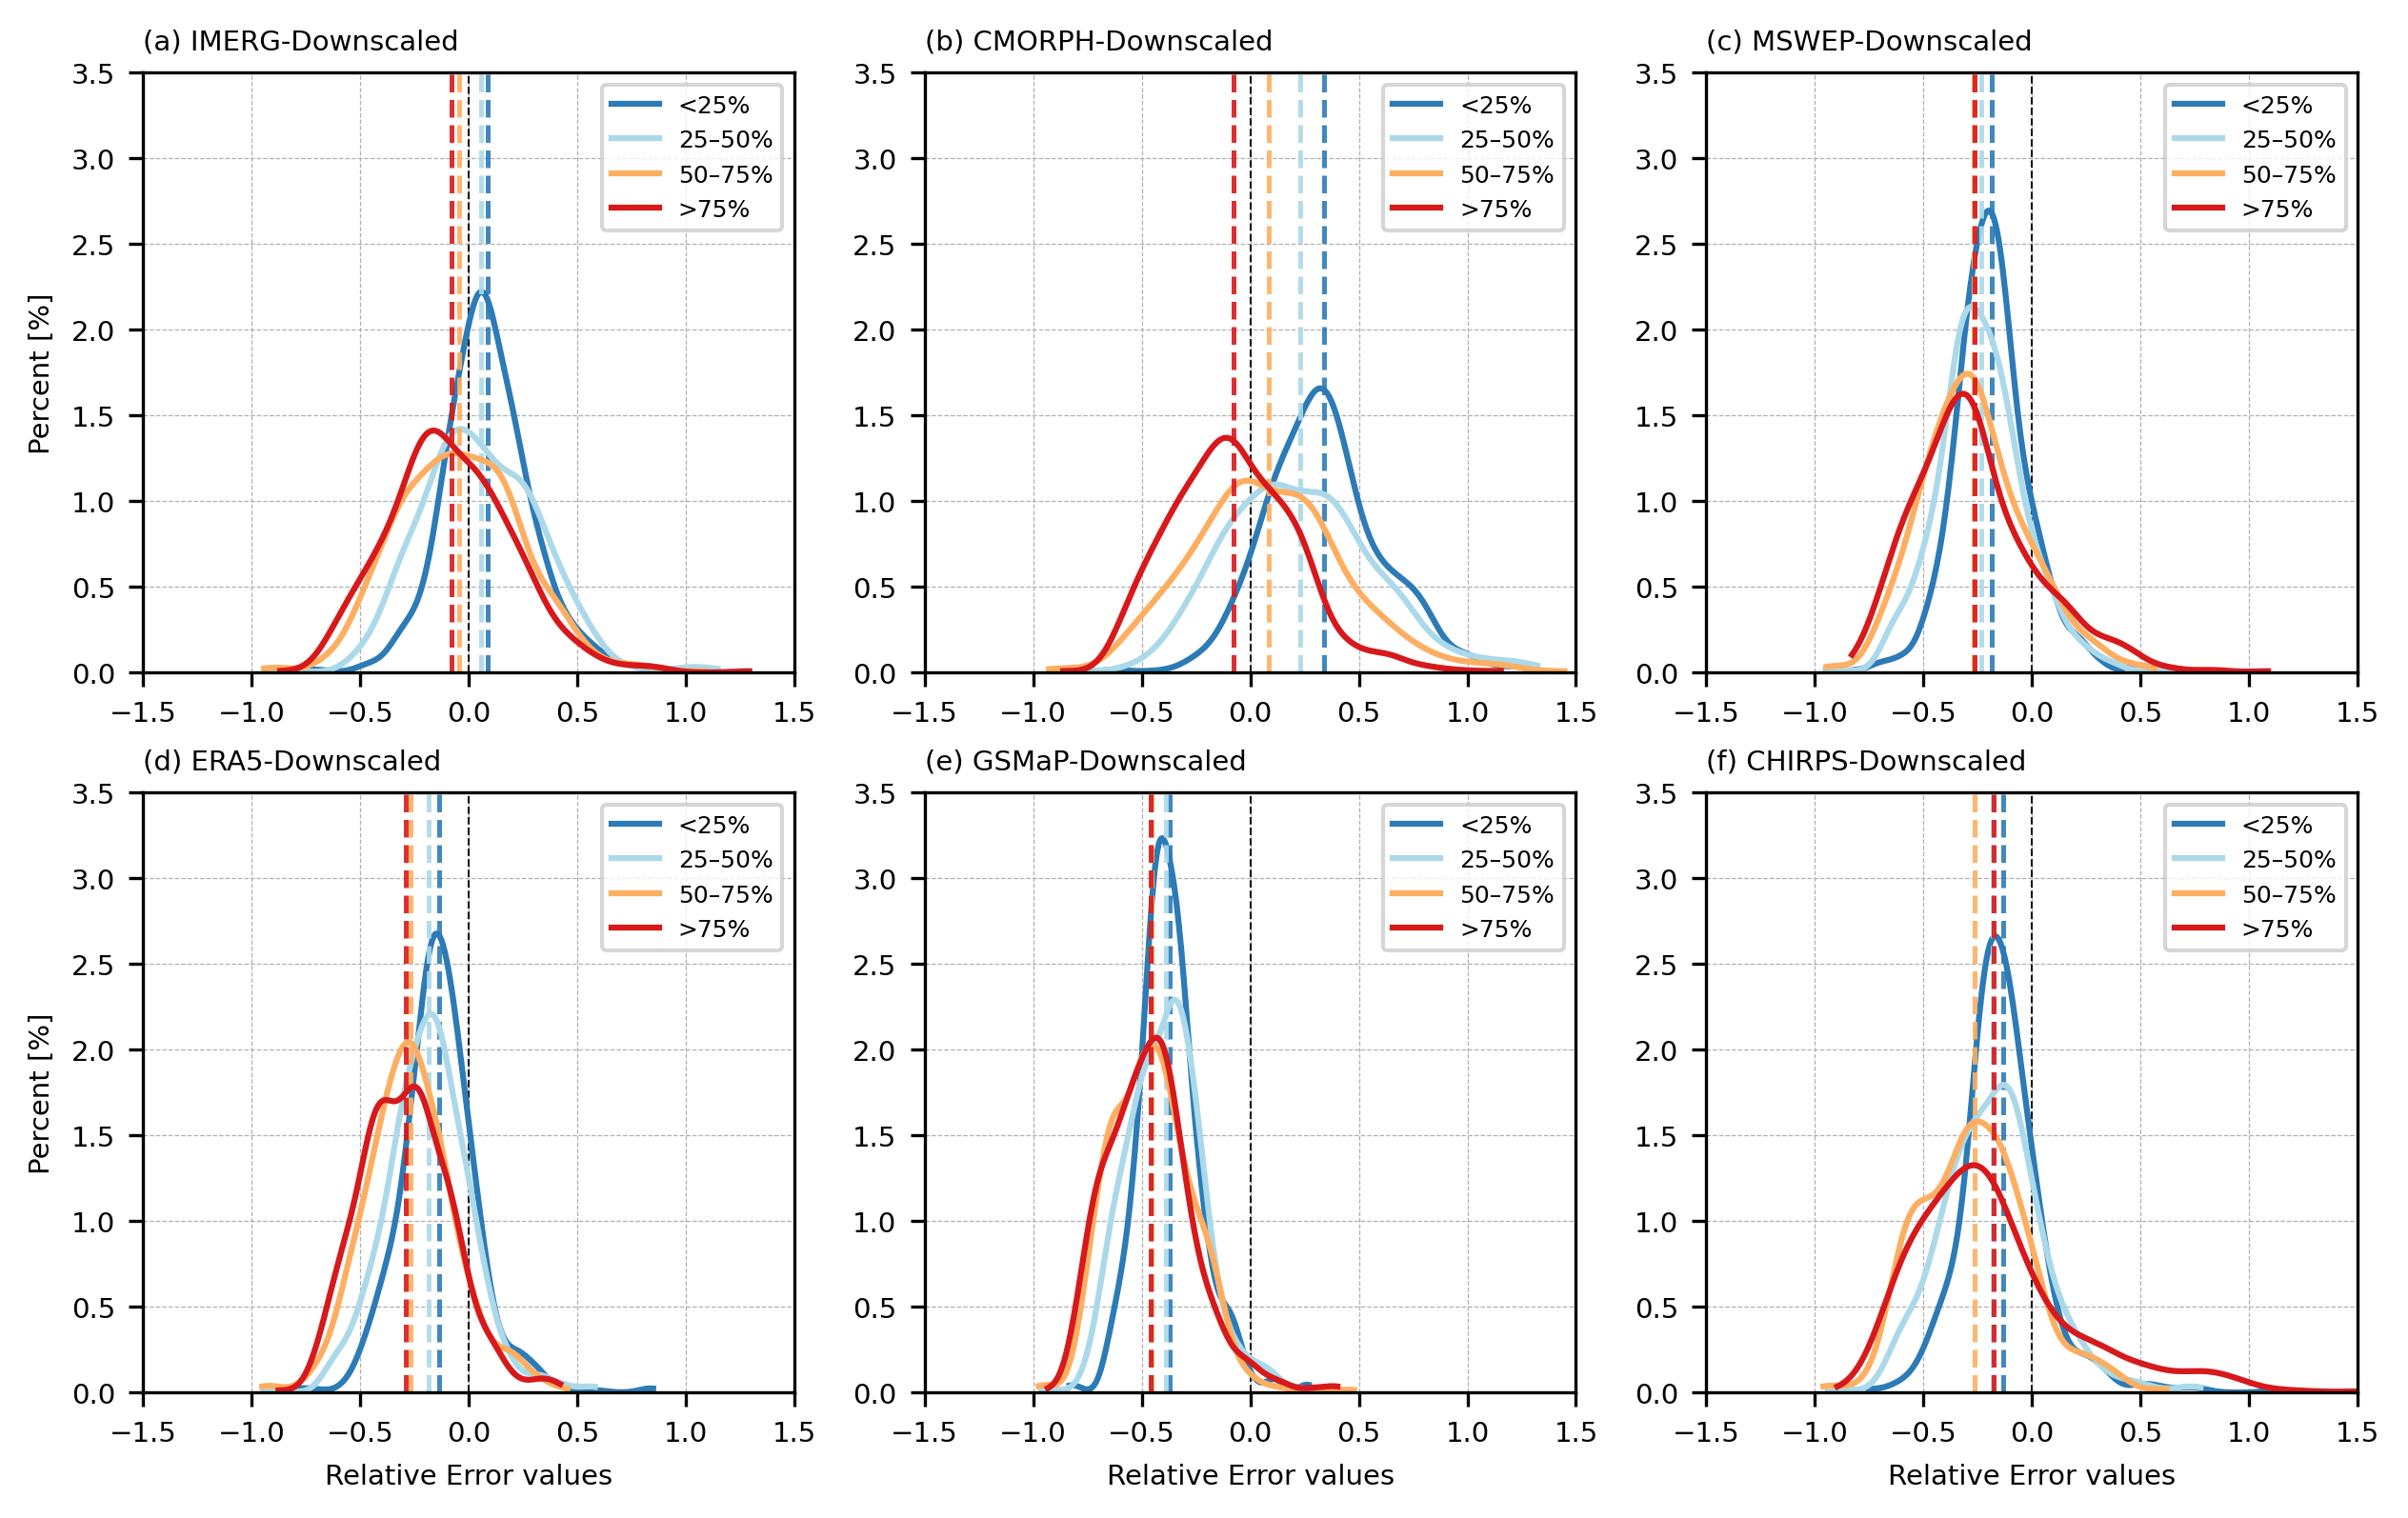

In [25]:
fig = plt.figure(figsize=(10, 6), dpi=300)
gs = gridspec.GridSpec(2, 3)

# ============================================================================================================================
axes = {}
pos = 0
for nrow in range(2):
    for ncol in range(3):
        ax = fig.add_subplot(gs[nrow, ncol])
        ax.legend(fontsize=6, loc=0, ncol=1)
        ax.grid(linewidth=0.3, linestyle='--')
        ax.set_xlim(-1.5,1.5)
        ax.set_ylim(0,3.5)
        ax.tick_params(axis='both', which='major', labelsize=7)
        ax.set_xlabel(' ',fontsize=7)
        if ncol == 0  and nrow < 2:
            ax.set_ylabel('Percent [%]',fontsize=7)
        else:
            ax.set_ylabel(' ',fontsize=7)
        if nrow == 1:
            ax.set_xlabel('Relative Error values',fontsize=7)
        ax.axvline(0, color='k',linestyle='--',linewidth=0.5,alpha=0.9)

        ax.set_title(f'{letters_list[pos]} {names_list[pos]}-Downscaled', fontsize=7, loc='left')
        pos += 1

        axes[(nrow, ncol)] = ax

# ==============================================================================================================================
sns.kdeplot(QUARTILE_IMERG[0].RED,color='#2c7bb6',cumulative=False,fill=False,multiple="stack",ax=axes[(0, 0)],label=f'<25%',
            clip=(np.nanmin(np.array(QUARTILE_IMERG[0].RED)), np.nanmax(np.array(QUARTILE_IMERG[0].RED))))
axes[(0, 0)].axvline(QUARTILE_IMERG_M[0], color='#2c7bb6',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_IMERG[1].RED,color='#abd9e9',cumulative=False,fill=False,multiple="stack",ax=axes[(0, 0)],label=f'25–50%',
            clip=(np.nanmin(np.array(QUARTILE_IMERG[1].RED)), np.nanmax(np.array(QUARTILE_IMERG[1].RED))))
axes[(0, 0)].axvline(QUARTILE_IMERG_M[1], color='#abd9e9',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_IMERG[2].RED,color='#fdae61',cumulative=False,fill=False,multiple="stack",ax=axes[(0, 0)],label=f'50–75%',
            clip=(np.nanmin(np.array(QUARTILE_IMERG[2].RED)), np.nanmax(np.array(QUARTILE_IMERG[2].RED))))
axes[(0, 0)].axvline(QUARTILE_IMERG_M[2], color='#fdae61',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_IMERG[3].RED,color='#d7191c',cumulative=False,fill=False,multiple="stack",ax=axes[(0, 0)],label=f'>75%',
            clip=(np.nanmin(np.array(QUARTILE_IMERG[3].RED)), np.nanmax(np.array(QUARTILE_IMERG[3].RED))))
axes[(0, 0)].axvline(QUARTILE_IMERG_M[3], color='#d7191c',linestyle='--',linewidth=1.2,alpha=0.9)

axes[(0, 0)].legend(fontsize=6, loc=0, ncol=1)

# ==============================================================================================================================
sns.kdeplot(QUARTILE_CMORPH[0].RED,color='#2c7bb6',cumulative=False,fill=False,multiple="stack",ax=axes[(0, 1)],label=f'<25%',
            clip=(np.nanmin(np.array(QUARTILE_CMORPH[0].RED)), np.nanmax(np.array(QUARTILE_CMORPH[0].RED))))
axes[(0, 1)].axvline(QUARTILE_CMORPH_M[0], color='#2c7bb6',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_CMORPH[1].RED,color='#abd9e9',cumulative=False,fill=False,multiple="stack",ax=axes[(0, 1)],label=f'25–50%',
            clip=(np.nanmin(np.array(QUARTILE_CMORPH[1].RED)), np.nanmax(np.array(QUARTILE_CMORPH[1].RED))))
axes[(0, 1)].axvline(QUARTILE_CMORPH_M[1], color='#abd9e9',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_CMORPH[2].RED,color='#fdae61',cumulative=False,fill=False,multiple="stack",ax=axes[(0, 1)],label=f'50–75%',
            clip=(np.nanmin(np.array(QUARTILE_CMORPH[2].RED)), np.nanmax(np.array(QUARTILE_CMORPH[2].RED))))
axes[(0, 1)].axvline(QUARTILE_CMORPH_M[2], color='#fdae61',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_CMORPH[3].RED,color='#d7191c',cumulative=False,fill=False,multiple="stack",ax=axes[(0, 1)],label=f'>75%',
            clip=(np.nanmin(np.array(QUARTILE_CMORPH[3].RED)), np.nanmax(np.array(QUARTILE_CMORPH[3].RED))))
axes[(0, 1)].axvline(QUARTILE_CMORPH_M[3], color='#d7191c',linestyle='--',linewidth=1.2,alpha=0.9)

axes[(0, 1)].legend(fontsize=6, loc=0, ncol=1)

# ==============================================================================================================================
sns.kdeplot(QUARTILE_MSWEP[0].RED,color='#2c7bb6',cumulative=False,fill=False,multiple="stack",ax=axes[(0, 2)],label=f'<25%',
            clip=(np.nanmin(np.array(QUARTILE_MSWEP[0].RED)), np.nanmax(np.array(QUARTILE_MSWEP[0].RED))))
axes[(0, 2)].axvline(QUARTILE_MSWEP_M[0], color='#2c7bb6',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_MSWEP[1].RED,color='#abd9e9',cumulative=False,fill=False,multiple="stack",ax=axes[(0, 2)],label=f'25–50%',
            clip=(np.nanmin(np.array(QUARTILE_MSWEP[1].RED)), np.nanmax(np.array(QUARTILE_MSWEP[1].RED))))
axes[(0, 2)].axvline(QUARTILE_MSWEP_M[1], color='#abd9e9',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_MSWEP[2].RED,color='#fdae61',cumulative=False,fill=False,multiple="stack",ax=axes[(0, 2)],label=f'50–75%',
            clip=(np.nanmin(np.array(QUARTILE_MSWEP[2].RED)), np.nanmax(np.array(QUARTILE_MSWEP[2].RED))))
axes[(0, 2)].axvline(QUARTILE_MSWEP_M[2], color='#fdae61',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_MSWEP[3].RED,color='#d7191c',cumulative=False,fill=False,multiple="stack",ax=axes[(0, 2)],label=f'>75%',
            clip=(np.nanmin(np.array(QUARTILE_MSWEP[3].RED)), np.nanmax(np.array(QUARTILE_MSWEP[3].RED))))
axes[(0, 2)].axvline(QUARTILE_MSWEP_M[3], color='#d7191c',linestyle='--',linewidth=1.2,alpha=0.9)

axes[(0, 2)].legend(fontsize=6, loc=0, ncol=1)

# ==============================================================================================================================
sns.kdeplot(QUARTILE_ERA5[0].RED,color='#2c7bb6',cumulative=False,fill=False,multiple="stack",ax=axes[(1, 0)],label=f'<25%',
            clip=(np.nanmin(np.array(QUARTILE_ERA5[0].RED)), np.nanmax(np.array(QUARTILE_ERA5[0].RED))))
axes[(1, 0)].axvline(QUARTILE_ERA5_M[0], color='#2c7bb6',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_ERA5[1].RED,color='#abd9e9',cumulative=False,fill=False,multiple="stack",ax=axes[(1, 0)],label=f'25–50%',
            clip=(np.nanmin(np.array(QUARTILE_ERA5[1].RED)), np.nanmax(np.array(QUARTILE_ERA5[1].RED))))
axes[(1, 0)].axvline(QUARTILE_ERA5_M[1], color='#abd9e9',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_ERA5[2].RED,color='#fdae61',cumulative=False,fill=False,multiple="stack",ax=axes[(1, 0)],label=f'50–75%',
            clip=(np.nanmin(np.array(QUARTILE_ERA5[2].RED)), np.nanmax(np.array(QUARTILE_ERA5[2].RED))))
axes[(1, 0)].axvline(QUARTILE_ERA5_M[2], color='#fdae61',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_ERA5[3].RED,color='#d7191c',cumulative=False,fill=False,multiple="stack",ax=axes[(1, 0)],label=f'>75%',
            clip=(np.nanmin(np.array(QUARTILE_ERA5[3].RED)), np.nanmax(np.array(QUARTILE_ERA5[3].RED))))
axes[(1, 0)].axvline(QUARTILE_ERA5_M[3], color='#d7191c',linestyle='--',linewidth=1.2,alpha=0.9)

axes[(1, 0)].legend(fontsize=6, loc=0, ncol=1)

# ==============================================================================================================================
sns.kdeplot(QUARTILE_GSMaP[0].RED,color='#2c7bb6',cumulative=False,fill=False,multiple="stack",ax=axes[(1, 1)],label=f'<25%',
            clip=(np.nanmin(np.array(QUARTILE_GSMaP[0].RED)), np.nanmax(np.array(QUARTILE_GSMaP[0].RED))))
axes[(1, 1)].axvline(QUARTILE_GSMaP_M[0], color='#2c7bb6',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_GSMaP[1].RED,color='#abd9e9',cumulative=False,fill=False,multiple="stack",ax=axes[(1, 1)],label=f'25–50%',
            clip=(np.nanmin(np.array(QUARTILE_GSMaP[1].RED)), np.nanmax(np.array(QUARTILE_GSMaP[1].RED))))
axes[(1, 1)].axvline(QUARTILE_GSMaP_M[1], color='#abd9e9',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_GSMaP[2].RED,color='#fdae61',cumulative=False,fill=False,multiple="stack",ax=axes[(1, 1)],label=f'50–75%',
            clip=(np.nanmin(np.array(QUARTILE_GSMaP[2].RED)), np.nanmax(np.array(QUARTILE_GSMaP[2].RED))))
axes[(1, 1)].axvline(QUARTILE_GSMaP_M[2], color='#fdae61',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_GSMaP[3].RED,color='#d7191c',cumulative=False,fill=False,multiple="stack",ax=axes[(1, 1)],label=f'>75%',
            clip=(np.nanmin(np.array(QUARTILE_GSMaP[3].RED)), np.nanmax(np.array(QUARTILE_GSMaP[3].RED))))
axes[(1, 1)].axvline(QUARTILE_GSMaP_M[3], color='#d7191c',linestyle='--',linewidth=1.2,alpha=0.9)

axes[(1, 1)].legend(fontsize=6, loc=0, ncol=1)

# ==============================================================================================================================
sns.kdeplot(QUARTILE_CHIRPS[0].RED,color='#2c7bb6',cumulative=False,fill=False,multiple="stack",ax=axes[(1, 2)],label=f'<25%',
            clip=(np.nanmin(np.array(QUARTILE_CHIRPS[0].RED)), np.nanmax(np.array(QUARTILE_CHIRPS[0].RED))))
axes[(1, 2)].axvline(QUARTILE_CHIRPS_M[0], color='#2c7bb6',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_CHIRPS[1].RED,color='#abd9e9',cumulative=False,fill=False,multiple="stack",ax=axes[(1, 2)],label=f'25–50%',
            clip=(np.nanmin(np.array(QUARTILE_CHIRPS[1].RED)), np.nanmax(np.array(QUARTILE_CHIRPS[1].RED))))
axes[(1, 2)].axvline(QUARTILE_CHIRPS_M[1], color='#abd9e9',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_CHIRPS[2].RED,color='#fdae61',cumulative=False,fill=False,multiple="stack",ax=axes[(1, 2)],label=f'50–75%',
            clip=(np.nanmin(np.array(QUARTILE_CHIRPS[2].RED)), np.nanmax(np.array(QUARTILE_CHIRPS[2].RED))))
axes[(1, 2)].axvline(QUARTILE_CHIRPS_M[2], color='#fdae61',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_CHIRPS[3].RED,color='#d7191c',cumulative=False,fill=False,multiple="stack",ax=axes[(1, 2)],label=f'>75%',
            clip=(np.nanmin(np.array(QUARTILE_CHIRPS[3].RED)), np.nanmax(np.array(QUARTILE_CHIRPS[3].RED))))
axes[(1, 2)].axvline(QUARTILE_CHIRPS_M[3], color='#d7191c',linestyle='--',linewidth=1.2,alpha=0.9)

axes[(1, 2)].legend(fontsize=6, loc=0, ncol=1)


# # ============================================================================================================================
# cbar_ax = fig.add_axes([0.96, 0.05, 0.026, 0.9])#0.96
# cbar = fig.colorbar(a1, cax=cbar_ax, orientation='vertical')
# cbar.ax.tick_params(labelsize=8)
# cbar.set_label("Elevation (m)", fontsize=9, labelpad=10)  

# # ============================================================================================================================
# plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.08, hspace=0.13)

# salida = '../figures/Article_down/Scatter_ALL.png'
# print(salida)
# # plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

Text(0.0, 1.0, '(d) >75% (~ 677 m)')

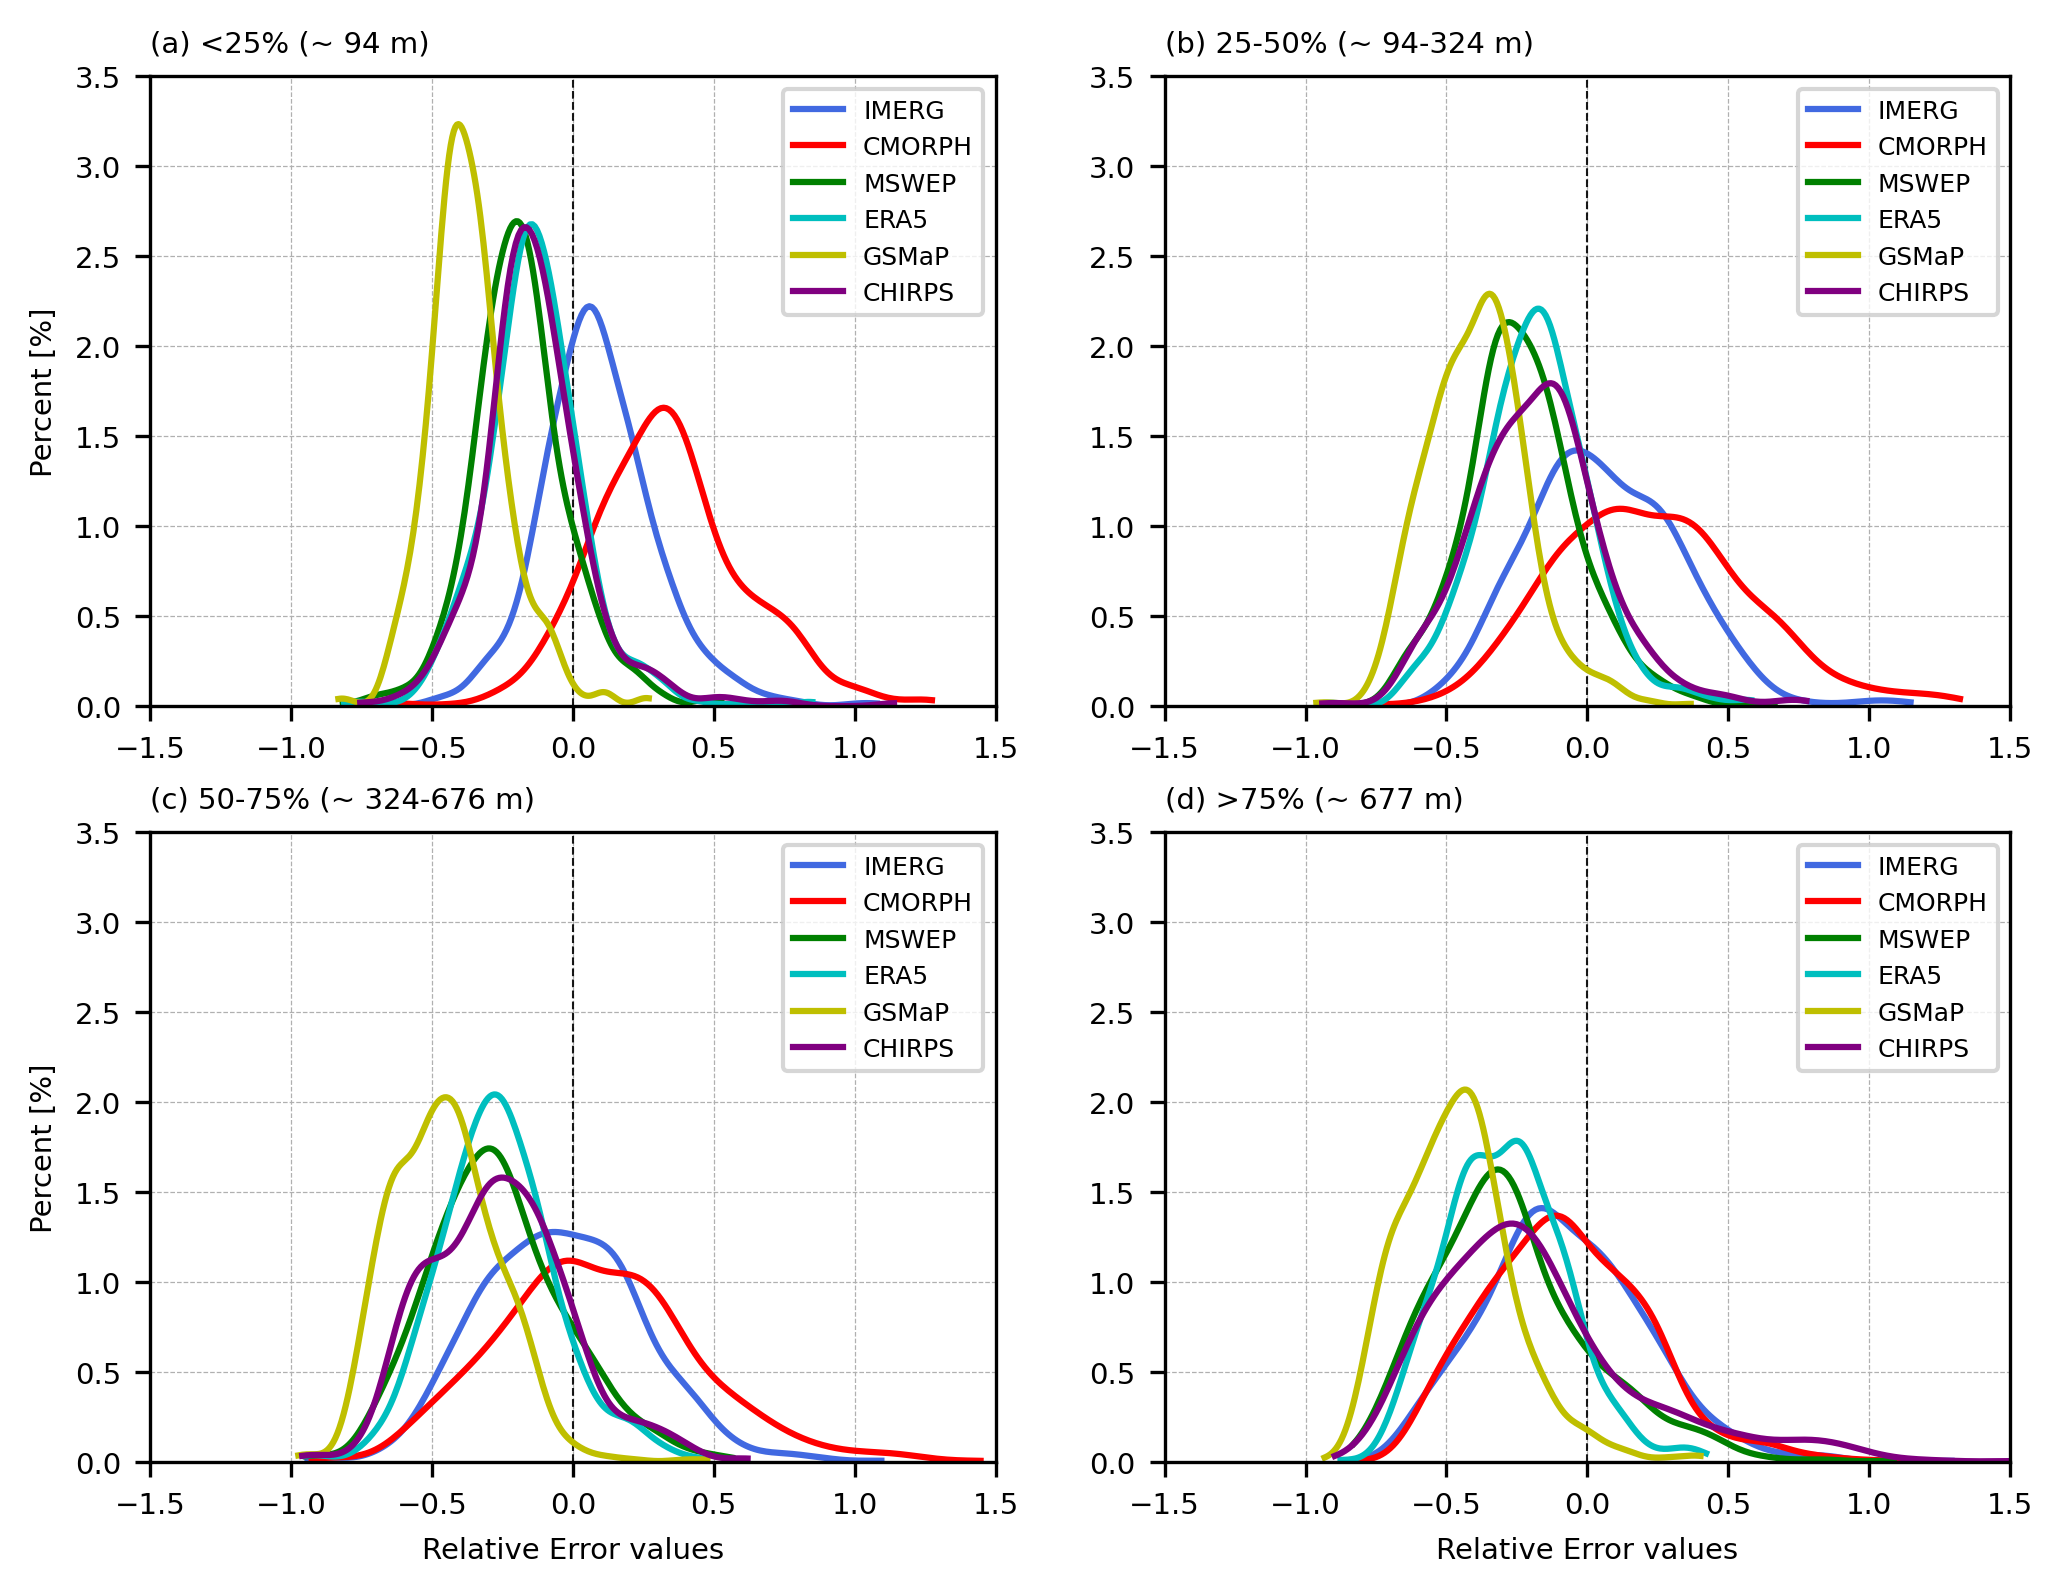

In [27]:
fig = plt.figure(figsize=(8, 6), dpi=300)
gs = gridspec.GridSpec(2, 2)

# ============================================================================================================================
axes = {}
for nrow in range(2):
    for ncol in range(2):
        ax = fig.add_subplot(gs[nrow, ncol])
        ax.legend(fontsize=6, loc=0, ncol=1)
        ax.grid(linewidth=0.3, linestyle='--')
        ax.set_xlim(-1.5,1.5)
        ax.set_ylim(0,3.5)
        ax.tick_params(axis='both', which='major', labelsize=7)
        ax.set_xlabel(' ',fontsize=7)
        if ncol == 0  and nrow < 2:
            ax.set_ylabel('Percent [%]',fontsize=7)
        else:
            ax.set_ylabel(' ',fontsize=7)
        if nrow == 1:
            ax.set_xlabel('Relative Error values',fontsize=7)
        ax.axvline(0, color='k',linestyle='--',linewidth=0.5,alpha=0.9)

        axes[(nrow, ncol)] = ax

# ============================================================================================================================
sns.kdeplot(QUARTILE_IMERG[0].RED,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 0)],label=f'IMERG',
            clip=(np.nanmin(np.array(QUARTILE_IMERG[0].RED)), np.nanmax(np.array(QUARTILE_IMERG[0].RED))))
sns.kdeplot(QUARTILE_CMORPH[0].RED,color=colors[1],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 0)],label=f'CMORPH',
            clip=(np.nanmin(np.array(QUARTILE_CMORPH[0].RED)), np.nanmax(np.array(QUARTILE_CMORPH[0].RED))))
sns.kdeplot(QUARTILE_MSWEP[0].RED,color=colors[2],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 0)],label=f'MSWEP',
            clip=(np.nanmin(np.array(QUARTILE_MSWEP[0].RED)), np.nanmax(np.array(QUARTILE_MSWEP[0].RED))))
sns.kdeplot(QUARTILE_ERA5[0].RED,color=colors[3],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 0)],label=f'ERA5',
            clip=(np.nanmin(np.array(QUARTILE_ERA5[0].RED)), np.nanmax(np.array(QUARTILE_ERA5[0].RED))))
sns.kdeplot(QUARTILE_GSMaP[0].RED,color=colors[4],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 0)],label=f'GSMaP',
            clip=(np.nanmin(np.array(QUARTILE_GSMaP[0].RED)), np.nanmax(np.array(QUARTILE_GSMaP[0].RED))))
sns.kdeplot(QUARTILE_CHIRPS[0].RED,color=colors[5],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 0)],label=f'CHIRPS',
            clip=(np.nanmin(np.array(QUARTILE_CHIRPS[0].RED)), np.nanmax(np.array(QUARTILE_CHIRPS[0].RED))))
axes[(0, 0)].legend(fontsize=6, loc=0, ncol=1)
axes[(0, 0)].set_title(f'(a) <25% (~ {int(QUARTILE_IMERG[0].ELEV.max())} m)', fontsize=7, loc='left')

# ============================================================================================================================
sns.kdeplot(QUARTILE_IMERG[1].RED,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 1)],label=f'IMERG',
            clip=(np.nanmin(np.array(QUARTILE_IMERG[1].RED)), np.nanmax(np.array(QUARTILE_IMERG[1].RED))))
sns.kdeplot(QUARTILE_CMORPH[1].RED,color=colors[1],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 1)],label=f'CMORPH',
            clip=(np.nanmin(np.array(QUARTILE_CMORPH[1].RED)), np.nanmax(np.array(QUARTILE_CMORPH[1].RED))))
sns.kdeplot(QUARTILE_MSWEP[1].RED,color=colors[2],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 1)],label=f'MSWEP',
            clip=(np.nanmin(np.array(QUARTILE_MSWEP[1].RED)), np.nanmax(np.array(QUARTILE_MSWEP[1].RED))))
sns.kdeplot(QUARTILE_ERA5[1].RED,color=colors[3],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 1)],label=f'ERA5',
            clip=(np.nanmin(np.array(QUARTILE_ERA5[1].RED)), np.nanmax(np.array(QUARTILE_ERA5[1].RED))))
sns.kdeplot(QUARTILE_GSMaP[1].RED,color=colors[4],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 1)],label=f'GSMaP',
            clip=(np.nanmin(np.array(QUARTILE_GSMaP[1].RED)), np.nanmax(np.array(QUARTILE_GSMaP[1].RED))))
sns.kdeplot(QUARTILE_CHIRPS[1].RED,color=colors[5],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 1)],label=f'CHIRPS',
            clip=(np.nanmin(np.array(QUARTILE_CHIRPS[1].RED)), np.nanmax(np.array(QUARTILE_CHIRPS[1].RED))))
axes[(0, 1)].legend(fontsize=6, loc=0, ncol=1)
axes[(0, 1)].set_title(f'(b) 25-50% (~ {int(QUARTILE_IMERG[1].ELEV.min())}-{int(QUARTILE_IMERG[1].ELEV.max())} m)', fontsize=7, loc='left')

# ============================================================================================================================
sns.kdeplot(QUARTILE_IMERG[2].RED,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 0)],label=f'IMERG',
            clip=(np.nanmin(np.array(QUARTILE_IMERG[2].RED)), np.nanmax(np.array(QUARTILE_IMERG[2].RED))))
sns.kdeplot(QUARTILE_CMORPH[2].RED,color=colors[1],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 0)],label=f'CMORPH',
            clip=(np.nanmin(np.array(QUARTILE_CMORPH[2].RED)), np.nanmax(np.array(QUARTILE_CMORPH[2].RED))))
sns.kdeplot(QUARTILE_MSWEP[2].RED,color=colors[2],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 0)],label=f'MSWEP',
            clip=(np.nanmin(np.array(QUARTILE_MSWEP[2].RED)), np.nanmax(np.array(QUARTILE_MSWEP[2].RED))))
sns.kdeplot(QUARTILE_ERA5[2].RED,color=colors[3],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 0)],label=f'ERA5',
            clip=(np.nanmin(np.array(QUARTILE_ERA5[2].RED)), np.nanmax(np.array(QUARTILE_ERA5[2].RED))))
sns.kdeplot(QUARTILE_GSMaP[2].RED,color=colors[4],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 0)],label=f'GSMaP',
            clip=(np.nanmin(np.array(QUARTILE_GSMaP[2].RED)), np.nanmax(np.array(QUARTILE_GSMaP[2].RED))))
sns.kdeplot(QUARTILE_CHIRPS[2].RED,color=colors[5],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 0)],label=f'CHIRPS',
            clip=(np.nanmin(np.array(QUARTILE_CHIRPS[2].RED)), np.nanmax(np.array(QUARTILE_CHIRPS[2].RED))))
axes[(1, 0)].legend(fontsize=6, loc=0, ncol=1)
axes[(1, 0)].set_title(f'(c) 50-75% (~ {int(QUARTILE_IMERG[2].ELEV.min())}-{int(QUARTILE_IMERG[2].ELEV.max())} m)', fontsize=7, loc='left')

# ============================================================================================================================
sns.kdeplot(QUARTILE_IMERG[3].RED,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 1)],label=f'IMERG',
            clip=(np.nanmin(np.array(QUARTILE_IMERG[3].RED)), np.nanmax(np.array(QUARTILE_IMERG[3].RED))))
sns.kdeplot(QUARTILE_CMORPH[3].RED,color=colors[1],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 1)],label=f'CMORPH',
            clip=(np.nanmin(np.array(QUARTILE_CMORPH[3].RED)), np.nanmax(np.array(QUARTILE_CMORPH[3].RED))))
sns.kdeplot(QUARTILE_MSWEP[3].RED,color=colors[2],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 1)],label=f'MSWEP',
            clip=(np.nanmin(np.array(QUARTILE_MSWEP[3].RED)), np.nanmax(np.array(QUARTILE_MSWEP[3].RED))))
sns.kdeplot(QUARTILE_ERA5[3].RED,color=colors[3],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 1)],label=f'ERA5',
            clip=(np.nanmin(np.array(QUARTILE_ERA5[3].RED)), np.nanmax(np.array(QUARTILE_ERA5[3].RED))))
sns.kdeplot(QUARTILE_GSMaP[3].RED,color=colors[4],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 1)],label=f'GSMaP',
            clip=(np.nanmin(np.array(QUARTILE_GSMaP[3].RED)), np.nanmax(np.array(QUARTILE_GSMaP[3].RED))))
sns.kdeplot(QUARTILE_CHIRPS[3].RED,color=colors[5],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 1)],label=f'CHIRPS',
            clip=(np.nanmin(np.array(QUARTILE_CHIRPS[3].RED)), np.nanmax(np.array(QUARTILE_CHIRPS[3].RED))))
axes[(1, 1)].legend(fontsize=6, loc=0, ncol=1)
axes[(1, 1)].set_title(f'(d) >75% (~ {int(QUARTILE_IMERG[3].ELEV.min())} m)', fontsize=7, loc='left')


## Test elevation using K-means

In [35]:
KMEANS_IMERG, KMEANS_IMERG_M = ART_sta.elevation_kmeans_robusto(DF_IMERG)
KMEANS_CMORPH, KMEANS_CMORPH_M = ART_sta.elevation_kmeans_robusto(DF_CMORPH)
KMEANS_MSWEP, KMEANS_MSWEP_M = ART_sta.elevation_kmeans_robusto(DF_MSWEP)
KMEANS_ERA5, KMEANS_ERA5_M = ART_sta.elevation_kmeans_robusto(DF_ERA5)
KMEANS_GSMaP, KMEANS_GSMaP_M = ART_sta.elevation_kmeans_robusto(DF_GSMaP)
KMEANS_CHIRPS, KMEANS_CHIRPS_M = ART_sta.elevation_kmeans_robusto(DF_CHIRPS)

## Elevation Groups Comparison

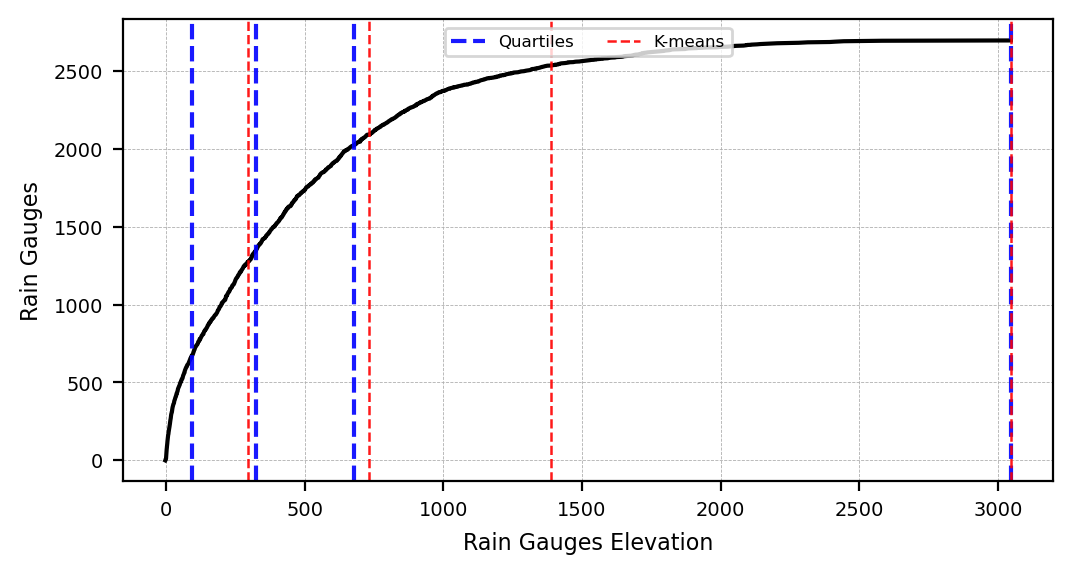

In [40]:
lw_quartile = 1.5
lw_kmeans = 0.9

fig = plt.figure(figsize=(6,3),dpi=200)
gs = gridspec.GridSpec(1,1)

# ==============================================================================
ax1 = plt.subplot(gs[0, 0])
ax1.plot(np.sort(DF_IMERG.ELEV), np.arange(len(DF_IMERG)), color='k')
ax1.axvline(QUARTILE_IMERG[0].ELEV.max(), color='b',linestyle='--',linewidth=lw_quartile,alpha=0.9, label='Quartiles')
ax1.axvline(QUARTILE_IMERG[1].ELEV.max(), color='b',linestyle='--',linewidth=lw_quartile,alpha=0.9)
ax1.axvline(QUARTILE_IMERG[2].ELEV.max(), color='b',linestyle='--',linewidth=lw_quartile,alpha=0.9)
ax1.axvline(QUARTILE_IMERG[3].ELEV.max(), color='b',linestyle='--',linewidth=lw_quartile,alpha=0.9)

ax1.axvline(KMEANS_IMERG[0].ELEV.max(), color='r',linestyle='--',linewidth=lw_kmeans,alpha=0.9, label='K-means')
ax1.axvline(KMEANS_IMERG[1].ELEV.max(), color='r',linestyle='--',linewidth=lw_kmeans,alpha=0.9)
ax1.axvline(KMEANS_IMERG[2].ELEV.max(), color='r',linestyle='--',linewidth=lw_kmeans,alpha=0.9)
ax1.axvline(KMEANS_IMERG[3].ELEV.max(), color='r',linestyle='--',linewidth=lw_kmeans,alpha=0.9)

ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_xlabel('Rain Gauges Elevation',fontsize=8)
ax1.set_ylabel('Rain Gauges',fontsize=8)
ax1.legend(fontsize=6,loc=9,ncol=2)
ax1.grid(linewidth=0.3, linestyle='--')

<Axes: xlabel='RER', ylabel='Density'>

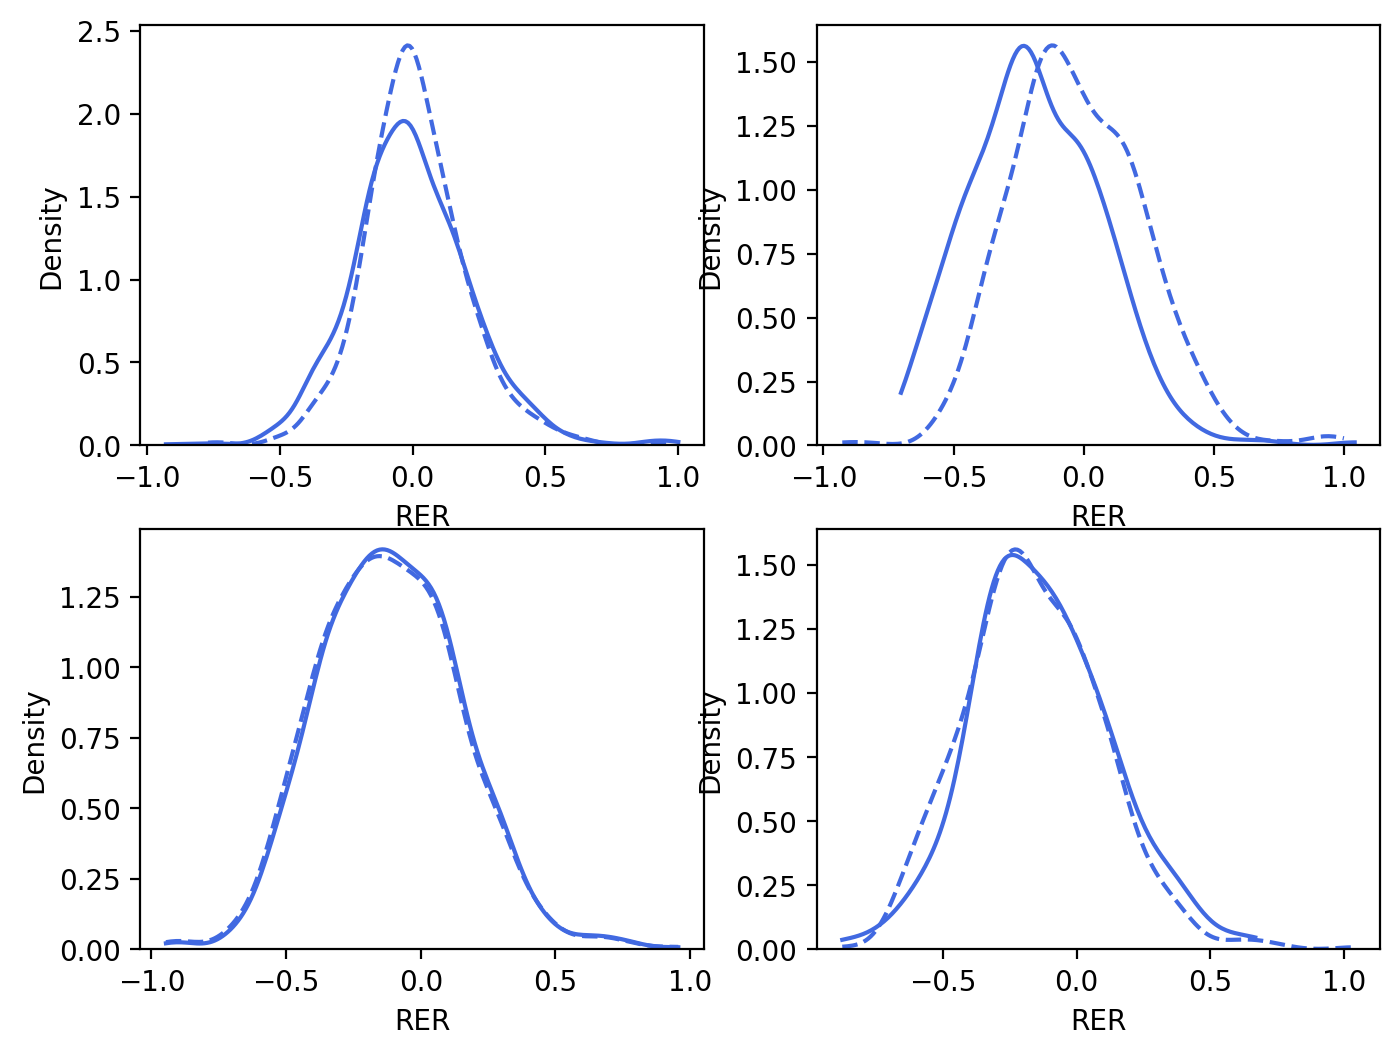

In [26]:
fig = plt.figure(figsize=(8,6),dpi=200)
gs = gridspec.GridSpec(2,2)

# =========================================================================================================================
ax1 = plt.subplot(gs[0, 0])
sns.kdeplot(IMERG1.RER,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG',
            clip=(np.nanmin(np.array(IMERG1.RER)), np.nanmax(np.array(IMERG1.RER))))
sns.kdeplot(DF_IMERG_[0].RER,color=colors[0],linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG',
            clip=(np.nanmin(np.array(DF_IMERG_[0].RER)), np.nanmax(np.array(DF_IMERG_[0].RER))))

ax1 = plt.subplot(gs[0, 1])
sns.kdeplot(IMERG2.RER,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG',
            clip=(np.nanmin(np.array(IMERG2.RER)), np.nanmax(np.array(IMERG2.RER))))
sns.kdeplot(DF_IMERG_[1].RER,color=colors[0],linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG',
            clip=(np.nanmin(np.array(DF_IMERG_[1].RER)), np.nanmax(np.array(DF_IMERG_[1].RER))))

ax1 = plt.subplot(gs[1, 0])
sns.kdeplot(IMERG3.RER,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG',
            clip=(np.nanmin(np.array(IMERG3.RER)), np.nanmax(np.array(IMERG3.RER))))
sns.kdeplot(DF_IMERG_[2].RER,color=colors[0],linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG',
            clip=(np.nanmin(np.array(DF_IMERG_[2].RER)), np.nanmax(np.array(DF_IMERG_[2].RER))))

ax1 = plt.subplot(gs[1, 1])
sns.kdeplot(IMERG4.RER,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG',
            clip=(np.nanmin(np.array(IMERG4.RER)), np.nanmax(np.array(IMERG4.RER))))
sns.kdeplot(DF_IMERG_[3].RER,color=colors[0],linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG',
            clip=(np.nanmin(np.array(DF_IMERG_[3].RER)), np.nanmax(np.array(DF_IMERG_[3].RER))))

<Axes: xlabel='RER', ylabel='Density'>

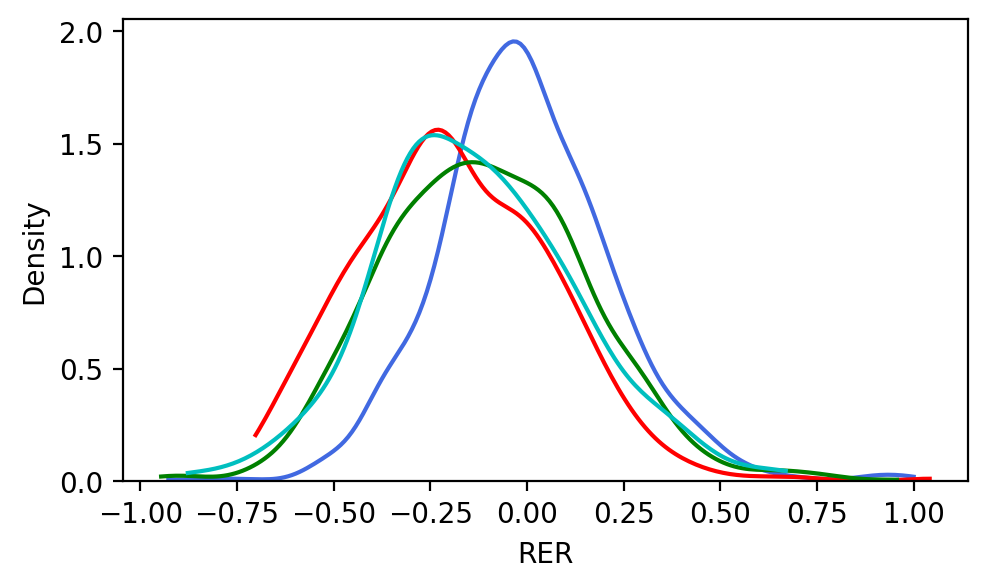

In [28]:
fig = plt.figure(figsize=(12,3),dpi=200)
gs = gridspec.GridSpec(1,2)

# =========================================================================================================================
ax1 = plt.subplot(gs[0, 0])

sns.kdeplot(IMERG1.RER,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG',
            clip=(np.nanmin(np.array(IMERG1.RER)), np.nanmax(np.array(IMERG1.RER))))
sns.kdeplot(IMERG2.RER,color=colors[1],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG',
            clip=(np.nanmin(np.array(IMERG2.RER)), np.nanmax(np.array(IMERG2.RER))))
sns.kdeplot(IMERG3.RER,color=colors[2],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG',
            clip=(np.nanmin(np.array(IMERG3.RER)), np.nanmax(np.array(IMERG3.RER))))
sns.kdeplot(IMERG4.RER,color=colors[3],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG',
            clip=(np.nanmin(np.array(IMERG4.RER)), np.nanmax(np.array(IMERG4.RER))))

## Scatter plot

## Spatial Analysis 

In [13]:
levels = np.arange(-1,1.1,0.1)
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=256)
scatter_cmap = 'coolwarm_r'

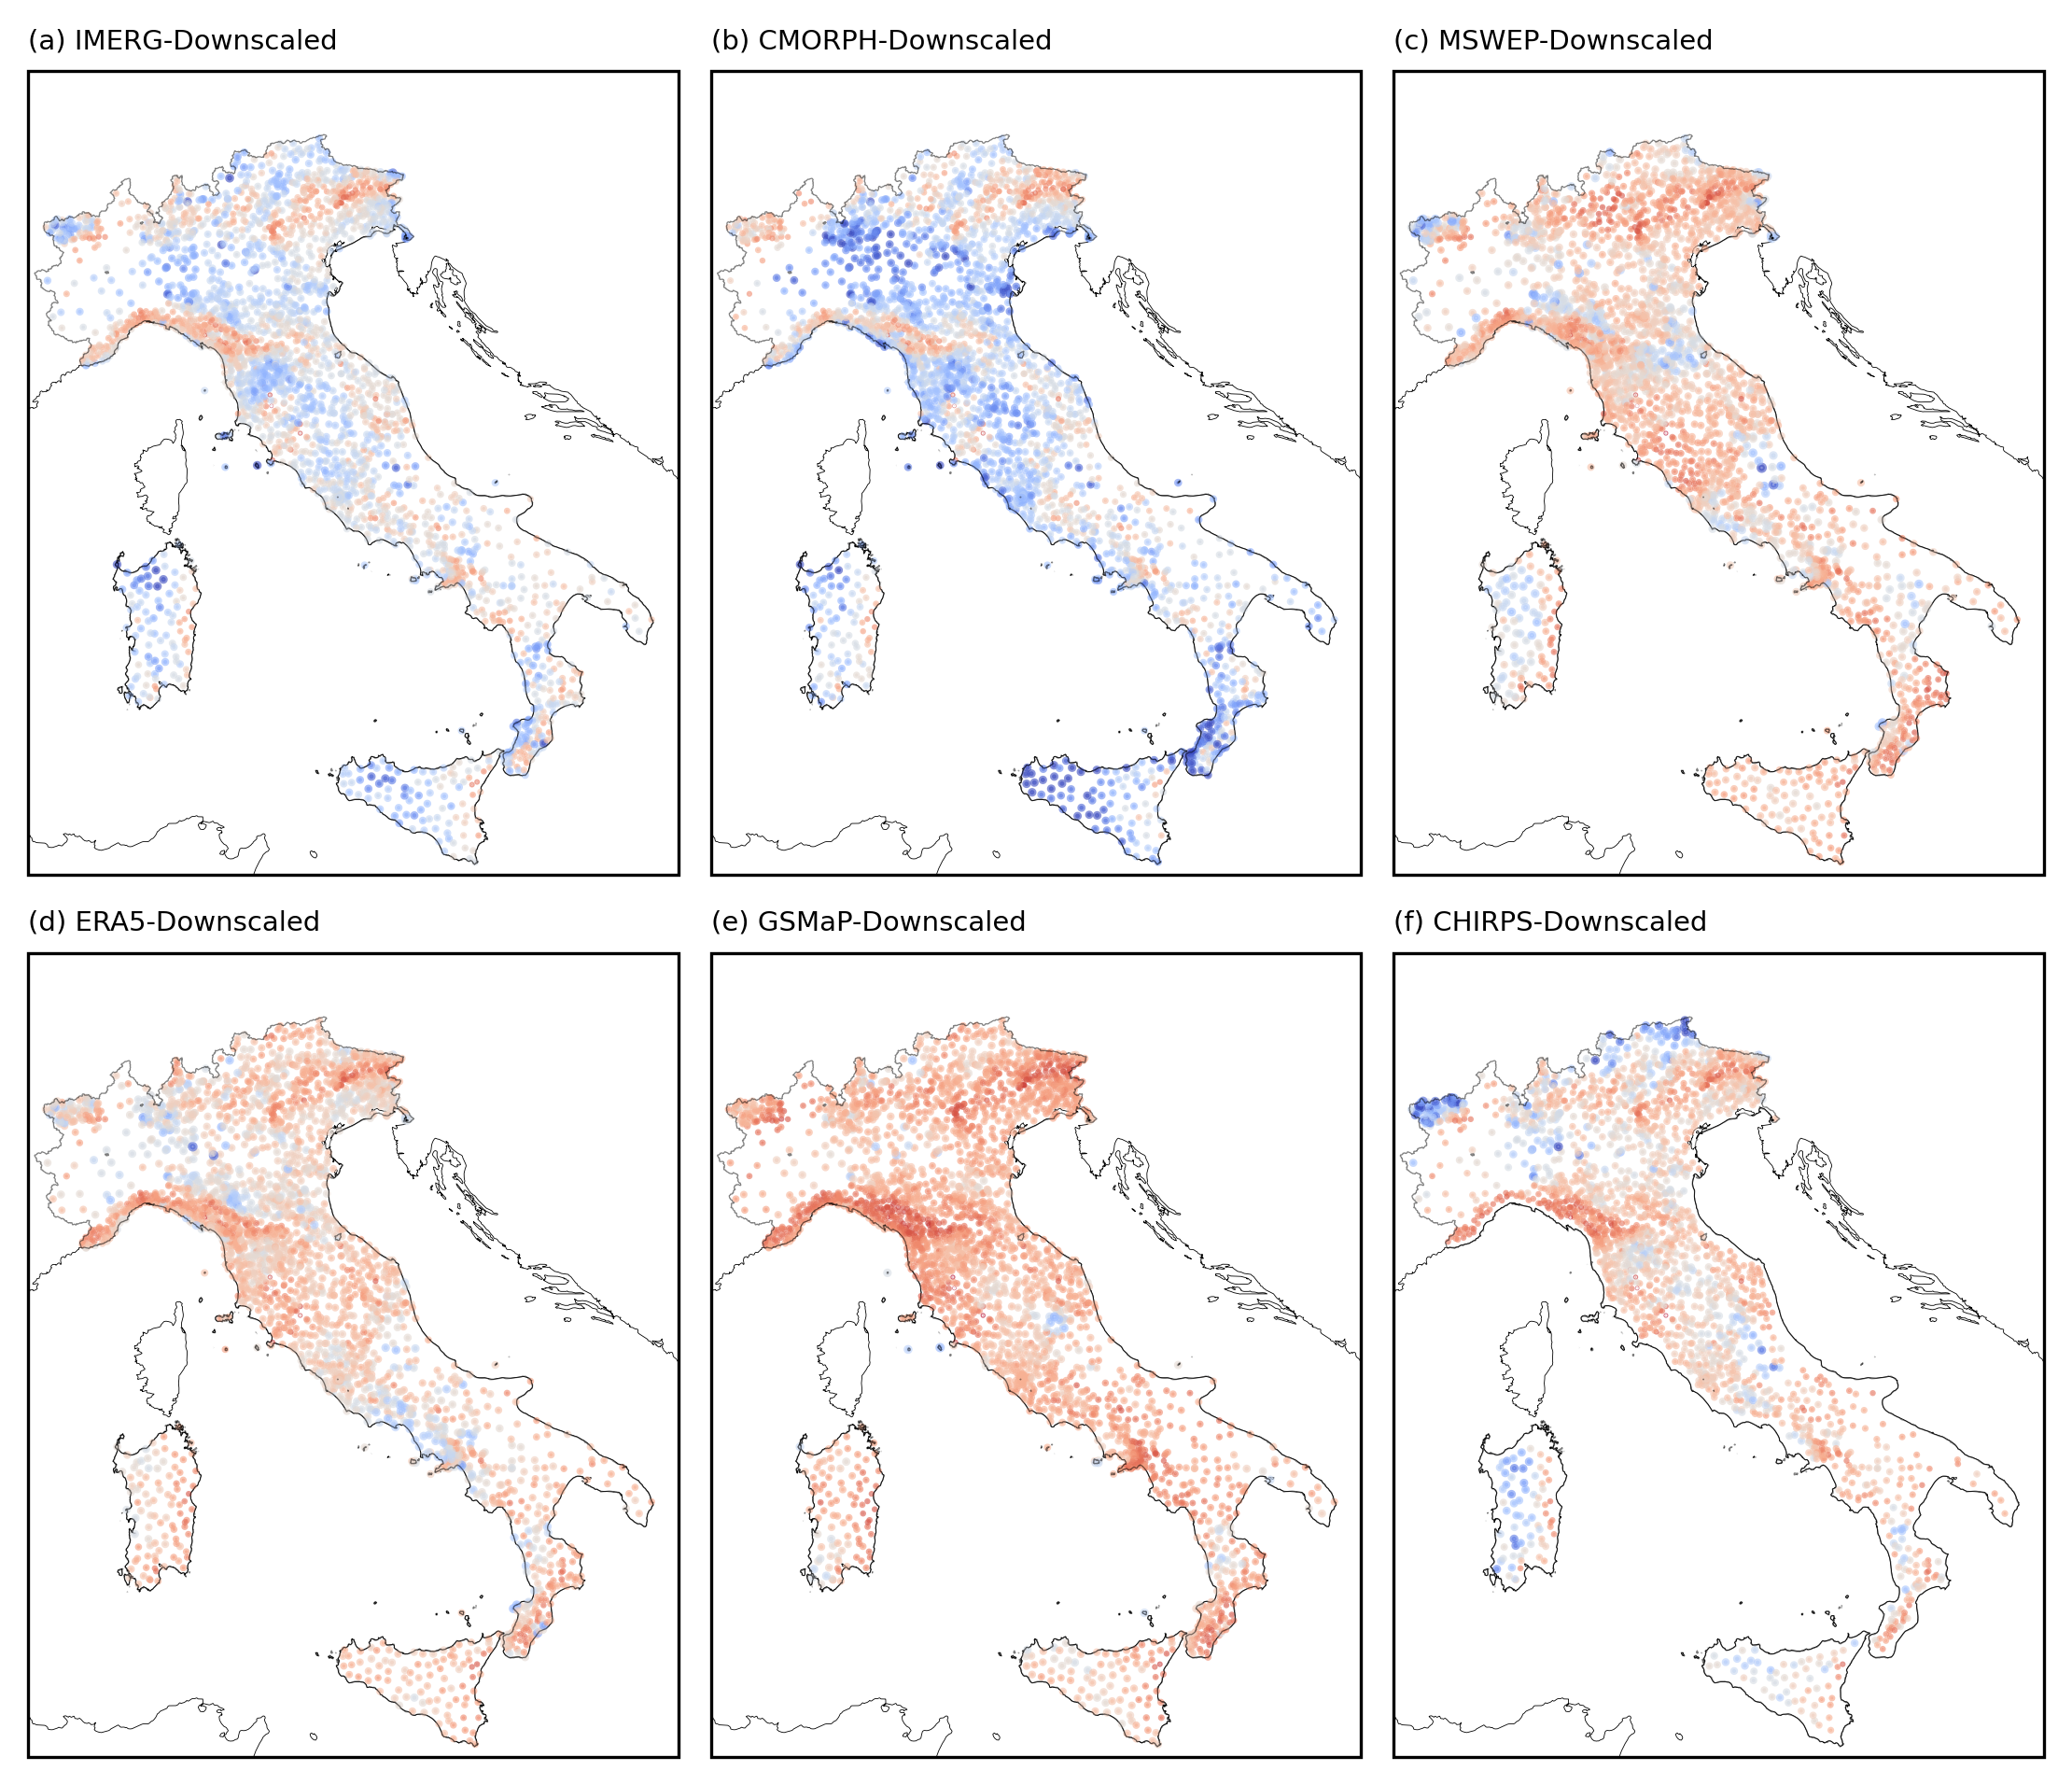

In [15]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8, 7), dpi=300)
gs = gridspec.GridSpec(2, 3)

axes = []
for nraw in range(2):
    for ncol in range(3):
        ax = fig.add_subplot(gs[nraw, ncol], projection=proj)
        # DEM.plot(facecolor='None', edgecolor='k', ax=ax, linewidth=0.1, zorder=21, alpha=0.5)
        ITALY.plot(facecolor='None', edgecolor='k', ax=ax, linewidth=0.3, zorder=21, alpha=0.5)
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
        ax.coastlines(linewidth=0.2)
        axes.append(ax)

for ax, DF, name, letter in zip(axes, DF_LIST, names_list, letters_list):
    mask = (
    DF['RED'].notna() &
    DF['REDn'].notna() &
    DF['LON'].notna() &
    DF['LAT'].notna()
    )

    ax.scatter(
    DF.loc[mask, 'LON'],
    DF.loc[mask, 'LAT'],
    c=DF.loc[mask, 'RED'],
    cmap=scatter_cmap,
    s=np.array(DF.loc[mask, 'REDn']) * 3,
    alpha=0.6,
    norm=norm,
    zorder=20
    )

    ax.set_title(f'{letter} {name}-Downscaled', fontsize=7, loc='left')

plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.05, hspace=0)